In [1]:
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,LSTM
from keras.preprocessing.text import text_to_word_sequence

import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

2023-08-25 19:23:33.911453: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-25 19:23:34.351016: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 19:23:37.735241: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 19:23:37.838986: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 19:23:41.886113: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Displaying all columns
pd.set_option('display.max_columns', None)

#Display all data in columns
pd.set_option("display.max_colwidth", None)

np.set_printoptions(threshold=None, edgeitems=None, linewidth=None, suppress=None)
pd.set_option("display.max_rows", None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)


In [3]:
train_df = pd.read_csv('train.csv')

In [17]:
train_df.shape

(120000, 3)

In [18]:
train_df.head(5)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [19]:
train_df['Description_preprocessed'] = train_df['Description']

In [20]:
#Dependencies
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/mist/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mist/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
train_df.duplicated().sum()

0

In [22]:
train_df.isnull().sum()

Class Index                 0
Title                       0
Description                 0
Description_preprocessed    0
dtype: int64

In [23]:
train_df['Class Index'].value_counts()  #Not imbalanced

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

In [24]:
#Preprocessing the description

In [25]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [26]:
!pip install contractions
!pip install wordcloud
!pip install autocorrect
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/mist/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#PreprocesDescriptionng 'overview' column

#Lowercasing

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].str.lower()


#Removing Contradictions

import contractions

def remove_contradictions(text):

    return " ".join([contractions.fix(word.text) for word in nlp(text)])

train_df['Description_preprocessed']= train_df['Description_preprocessed'].apply(remove_contradictions)



# Removing HTML tags

import re

def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(remove_html)


#Removing URL

import re

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

train_df['Description_preprocessed']= train_df['Description_preprocessed'].apply(remove_url)



def remove_at_the_rate_and_mentions(text):

      return ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)"," ",text).split())


train_df['Description_preprocessed']= train_df['Description_preprocessed'].apply(remove_at_the_rate_and_mentions)



#Remmove punctuation

import string

punc = string.punctuation

def  remove_punc(text):

    return text.translate(str.maketrans('', '', punc))

train_df['Description_preprocessed']= train_df['Description_preprocessed'].apply(remove_punc)




# Removing stop words


from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def remove_stop_words(text):
    ls = []
    new = []

    ls = nlp(text)

    for word in ls:
        if word.text not in stopwords:

            new.append(word.text)

    return ' '.join(new)

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(remove_stop_words)



def Lemmetization(text):

    return " ".join([word.lemma_ for word in nlp(text)])

train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(Lemmetization)




In [28]:
#Preprocesing the 'Title' column

In [29]:
train_df['Title_processed'] = train_df['Title']

In [30]:
#Preprocessing 'overview' column

#Lowercasing

train_df['Title_processed'] = train_df['Title_processed'].str.lower()


#Removing Contradictions

import contractions

def remove_contradictions(text):

    return " ".join([contractions.fix(word.text) for word in nlp(text)])

train_df['Title_processed']= train_df['Title_processed'].apply(remove_contradictions)




# Removing HTML tags

import re

def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

train_df['Title_processed'] = train_df['Title_processed'].apply(remove_html)



#Removing URL

import re

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

train_df['Title_processed']= train_df['Title_processed'].apply(remove_url)




def remove_at_the_rate_and_mentions(text):

      return ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)"," ",text).split())


train_df['Title_processed']= train_df['Title_processed'].apply(remove_at_the_rate_and_mentions)


#Remmove punctuation

import string

punc = string.punctuation

def  remove_punc(text):

    return text.translate(str.maketrans('', '', punc))

train_df['Title_processed']= train_df['Title_processed'].apply(remove_punc)




from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def remove_stop_words(text):
    ls = []
    new = []

    ls = nlp(text)

    for word in ls:
        if word.text not in stopwords:

            new.append(word.text)

    return ' '.join(new)

train_df['Title_processed'] = train_df['Title_processed'].apply(remove_stop_words)



def Lemmetization(text):

    return " ".join([word.lemma_ for word in nlp(text)])



train_df['Title_processed'] = train_df['Title_processed'].apply(Lemmetization)




In [31]:
# train_df.drop(columns='Title_processed', axis=1, inplace=True)

In [32]:
string = train_df.iloc[1, 1]

In [33]:
string.lower()

'carlyle looks toward commercial aerospace (reuters)'

In [34]:
def insert_spaces_at_begining(string):
    string = ' ' + string
    return string

In [35]:
train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(insert_spaces_at_begining)

In [36]:
train_df['tags'] = train_df['Title_processed'] + train_df['Description_preprocessed']

In [37]:
train_df.head(1)

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuter reuter short seller wall street dwindlingband ultra cynic see green


In [3]:
train_df = pd.read_csv('train_transformed.csv')

In [4]:
train_df['tags_for_corpus'] = train_df['tags']

In [5]:
train_df.head()

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags,tags_for_corpus,cnt
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuter reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter reuter short seller wall street dwindlingband ultra cynic see green,17
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,carlyle look toward commercial aerospace reuter,carlyle look toward commercial aerospace reuter reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,carlyle look toward commercial aerospace reuter reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,26
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,oil economy cloud stock outlook reuter,oil economy cloud stock outlook reuter reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,oil economy cloud stock outlook reuter reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,24
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,iraq halt oil export main southern pipeline reuter,iraq halt oil export main southern pipeline reuter reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,iraq halt oil export main southern pipeline reuter reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,27
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,oil price soar time record pose new menace us economy afp,oil price soar time record pose new menace us economy afp afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,oil price soar time record pose new menace us economy afp afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,30


In [13]:
def making_corpus(string):
    data = string.split()
    return data

In [14]:
string = 'wall st bear claw back black reuterreuter short seller wall street dwindlingband ultra cynic see green'

In [15]:
making_corpus(string)

['wall',
 'st',
 'bear',
 'claw',
 'back',
 'black',
 'reuterreuter',
 'short',
 'seller',
 'wall',
 'street',
 'dwindlingband',
 'ultra',
 'cynic',
 'see',
 'green']

In [16]:
train_df['tags_for_corpus'] = train_df['tags_for_corpus'].apply(making_corpus)

In [17]:
corpus=[]

In [18]:
def corpus_formation_full(ls):
    corpus.append(ls)

In [19]:
train_df['tags_for_corpus'] = train_df['tags_for_corpus'].apply(corpus_formation_full)

In [20]:
corpus

[['wall',
  'st',
  'bear',
  'claw',
  'back',
  'black',
  'reuter',
  'reuter',
  'short',
  'seller',
  'wall',
  'street',
  'dwindlingband',
  'ultra',
  'cynic',
  'see',
  'green'],
 ['carlyle',
  'look',
  'toward',
  'commercial',
  'aerospace',
  'reuter',
  'reuter',
  'private',
  'investment',
  'firm',
  'carlyle',
  'groupwhich',
  'reputation',
  'make',
  'well',
  'time',
  'occasionallycontroversial',
  'play',
  'defense',
  'industry',
  'quietly',
  'placedit',
  'bet',
  'another',
  'part',
  'market'],
 ['oil',
  'economy',
  'cloud',
  'stock',
  'outlook',
  'reuter',
  'reuter',
  'soar',
  'crude',
  'price',
  'plus',
  'worriesabout',
  'economy',
  'outlook',
  'earning',
  'expect',
  'tohang',
  'stock',
  'market',
  'next',
  'week',
  'depth',
  'thesummer',
  'doldrum'],
 ['iraq',
  'halt',
  'oil',
  'export',
  'main',
  'southern',
  'pipeline',
  'reuter',
  'reuters',
  'authority',
  'halt',
  'oil',
  'exportflow',
  'main',
  'pipeline',
 

In [21]:
# from itertools import chain
# flatten_corpus = list(chain.from_iterable(corpus))

In [22]:
#Using pretrained wor2vec

In [4]:
import gensim.downloader

In [5]:
google_news_word2vec_model = gensim.downloader.load('word2vec-google-news-300')

In [5]:
# from gensim.models import FastText

In [44]:
model = gensim.models.FastText(window=10, min_count=1, workers=8, vector_size=300, sg=1, negative=10)

In [46]:
model.build_vocab(corpus)

In [48]:
model.train(corpus, total_examples=model.corpus_count, epochs=100)

(311023672, 317778900)

In [ ]:
google_news_word2vec_model.most_similar('music')

In [6]:
#Building vocabulary
vocabulary = google_news_word2vec_model.index_to_key

In [7]:
len(vocabulary)

3000000

In [8]:
word_vec_dict = {}

for i in vocabulary:
      word_vec_dict[i] = google_news_word2vec_model.get_vector(i)
print(len(word_vec_dict))

3000000


In [8]:
train_df.shape

NameError: name 'train_df' is not defined

In [44]:
train_df.isnull().sum()

Class Index                      0
Title                            0
Description                      0
Description_preprocessed         0
Title_processed                  5
tags                             0
tags_for_corpus             120000
dtype: int64

In [46]:
def cnt_len_of_each_sentence(string):
    length = len(string.split())
    return length

In [47]:
train_df['cnt'] = train_df['tags'].apply(cnt_len_of_each_sentence)

In [48]:
train_df.head()

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags,tags_for_corpus,cnt
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuter reuter short seller wall street dwindlingband ultra cynic see green,None,17
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,carlyle look toward commercial aerospace reuter,carlyle look toward commercial aerospace reuter reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,None,26
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,oil economy cloud stock outlook reuter,oil economy cloud stock outlook reuter reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,None,24
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,iraq halt oil export main southern pipeline reuter,iraq halt oil export main southern pipeline reuter reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,None,27
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,oil price soar time record pose new menace us economy afp,oil price soar time record pose new menace us economy afp afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,None,30


In [26]:
train_df.to_csv('train_transformed.csv', index=False)

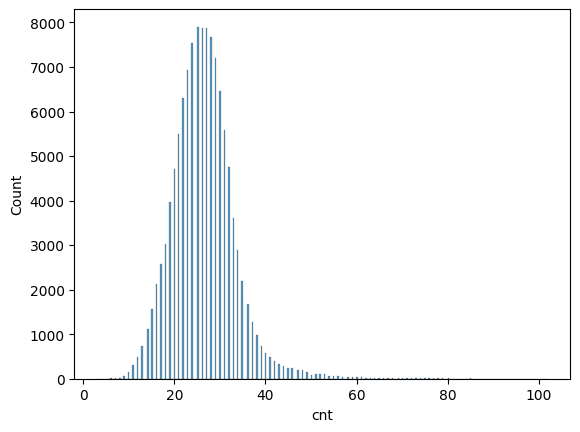

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = train_df['cnt'])
plt.show()

In [6]:
tok = Tokenizer()
tok.fit_on_texts(train_df['tags'])
vocab_size = len(tok.word_index) + 1

In [7]:
max_len = 100

In [78]:
def is_num(string):
    data = string.split()
    temp = []
    for i in data:
        if i.isnumeric() == False:
            temp.append(i)
    return ' '.join(temp)

In [79]:
is_num('money fund fall late week ap ap asset nation retail money market mutual fund fall 36117 billion late week 3684998 trillion investment company institute say thursday')

'money fund fall late week ap ap asset nation retail money market mutual fund fall billion late week trillion investment company institute say thursday'

In [80]:
train_df['tags'] = train_df['tags'].apply(is_num)

In [81]:
def is_alnum(string):

    return ' '.join(w for w in string.split() if not any(x.isdigit() for x in w))


In [82]:
train_df['tags'] = train_df['tags'].apply(is_alnum)

In [83]:
is_alnum('stock end near year low reuter reuter stock end slightly high fridaybut stay near low year oil price surge past 3646a barrel offset positive outlook computer makerdell inc dello')

'stock end near year low reuter reuter stock end slightly high fridaybut stay near low year oil price surge past barrel offset positive outlook computer makerdell inc dello'

In [84]:
train_df.head(10)

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags,tags_for_corpus,cnt
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuter reuter short seller wall street dwindlingband ultra cynic see green,NaN,17
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,carlyle look toward commercial aerospace reuter,carlyle look toward commercial aerospace reuter reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,NaN,26
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,oil economy cloud stock outlook reuter,oil economy cloud stock outlook reuter reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,NaN,24
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,iraq halt oil export main southern pipeline reuter,iraq halt oil export main southern pipeline reuter reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,NaN,27
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,oil price soar time record pose new menace us economy afp,oil price soar time record pose new menace us economy afp afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,NaN,30
5,3,"Stocks End Up, But Near Year Lows (Reuters)","Reuters - Stocks ended slightly higher on Friday\but stayed near lows for the year as oil prices surged past #36;46\a barrel, offsetting a positive outlook from computer maker\Dell Inc. (DELL.O)",reuter stock end slightly high fridaybut stay near low year oil price surge past 3646a barrel offset positive outlook computer makerdell inc dello,stock end near year low reuter,stock end near year low reuter reuter stock end slightly high fridaybut stay near low year oil price surge past barrel offset positive outlook computer makerdell inc dello,NaN,29
6,3,Money Funds Fell in Latest Week (AP),"AP - Assets of the nation's retail money market mutual funds fell by #36;1.17 billion in the latest week to #36;849.98 trillion, the Investment Company Institute said Thursday.",ap asset nation retail money market mutual fund fall 36117 billion late week 3684998 trillion investment company institute 

In [86]:
google_news_word2vec_model['ground']

array([ 0.02514648, -0.125     ,  0.15332031, -0.109375  , -0.22851562,
       -0.21191406,  0.08300781, -0.08300781,  0.0480957 ,  0.10058594,
        0.01416016, -0.06396484,  0.02319336,  0.17871094, -0.29492188,
       -0.07519531, -0.15722656, -0.04492188, -0.00564575, -0.06738281,
       -0.26367188,  0.03540039,  0.22851562, -0.10253906,  0.19238281,
        0.00375366, -0.07617188,  0.10253906,  0.16992188, -0.19335938,
        0.06176758,  0.07617188,  0.13378906, -0.22460938, -0.28515625,
       -0.19140625, -0.23339844,  0.0859375 ,  0.03222656, -0.20996094,
        0.18261719, -0.19140625,  0.13476562,  0.15136719,  0.00354004,
        0.08984375, -0.11572266, -0.03930664,  0.27148438,  0.25195312,
        0.24023438, -0.12353516, -0.0480957 , -0.0534668 , -0.07519531,
       -0.08154297,  0.11572266,  0.01855469,  0.23144531, -0.10986328,
        0.03320312, -0.16992188,  0.04003906, -0.0390625 , -0.25976562,
        0.06787109,  0.14257812, -0.00250244,  0.12402344,  0.25

In [8]:
encd_reviews = tok.texts_to_sequences(train_df['tags'])

In [9]:
embd_dim = 300

In [10]:
pad_reviews = pad_sequences(maxlen = max_len, padding='pre', sequences=encd_reviews)

In [11]:
pad_reviews.shape

(120000, 100)

In [12]:
pad_reviews

array([[    0,     0,     0, ..., 18041,   134,   707],
       [    0,     0,     0, ...,   199,   241,    65],
       [    0,     0,     0, ...,  4382, 24304, 13536],
       ...,
       [    0,     0,     0, ...,   276,    28,    89],
       [    0,     0,     0, ...,  1512,     4,   674],
       [    0,     0,     0, ...,  1549,   749,    35]], dtype=int32)

In [20]:
# embd_values = google_news_word2vec_model.get_normed_vectors()

In [21]:
# all_embd = np.stack(embd_values)
# embd_mean, embd_std = all_embd.mean(), all_embd.std()

In [110]:
final_embeddings = np.zeros((vocab_size, embd_dim))
for word , i in tok.word_index.items():
    try:
        word_embedding = google_news_word2vec_model[word]
        if word_embedding is not None:
            final_embeddings[i] = word_embedding
    except:
            pass

In [111]:
len(final_embeddings)

66591

In [112]:
vocab_size

66591

In [113]:
final_embeddings[2]

array([ 1.12915039e-02,  2.89306641e-02,  8.34960938e-02, -4.98046875e-02,
       -1.30859375e-01, -1.09863281e-01, -1.15234375e-01, -7.47070312e-02,
       -8.93554688e-02,  2.18750000e-01,  3.71093750e-02,  9.47265625e-02,
        2.34375000e-02, -8.44726562e-02, -2.65625000e-01, -1.00585938e-01,
        4.63867188e-03,  1.15234375e-01,  8.25195312e-02,  2.06298828e-02,
       -3.68652344e-02, -3.20434570e-04, -9.91210938e-02,  1.58691406e-02,
       -6.34765625e-02,  1.87500000e-01,  8.98437500e-02,  1.77734375e-01,
        1.20117188e-01,  3.71093750e-02, -1.19628906e-01,  4.05273438e-02,
       -3.22265625e-02, -3.80859375e-02,  1.26953125e-01, -1.58203125e-01,
       -5.07812500e-02, -1.56250000e-01,  8.64257812e-02, -1.17187500e-01,
        1.39648438e-01, -1.59179688e-01, -4.07714844e-02,  1.22070312e-01,
        5.24902344e-02, -1.13281250e-01,  7.91015625e-02,  1.82617188e-01,
       -5.90820312e-02, -2.20947266e-02,  9.08203125e-02,  3.49121094e-02,
       -1.02539062e-02, -

In [13]:
import pickle

In [14]:
final_embeddings = pickle.load(open('final_embeddings_news_classifier.pkl', 'rb'))

In [115]:
pickle.dump(final_embeddings, open('final_embeddings_news_classifier.pkl', 'wb'))

In [7]:
train_df.head()

,Class Index,Title,Description,Description_preprocessed,Title_processed,tags,tags_for_corpus,cnt
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",reuter short seller wall street dwindlingband ultra cynic see green,wall st bear claw back black reuter,wall st bear claw back black reuter reuter short seller wall street dwindlingband ultra cynic see green,NaN,17
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,carlyle look toward commercial aerospace reuter,carlyle look toward commercial aerospace reuter reuter private investment firm carlyle groupwhich reputation make well time occasionallycontroversial play defense industry quietly placedit bet another part market,NaN,26
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,oil economy cloud stock outlook reuter,oil economy cloud stock outlook reuter reuter soar crude price plus worriesabout economy outlook earning expect tohang stock market next week depth thesummer doldrum,NaN,24
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,iraq halt oil export main southern pipeline reuter,iraq halt oil export main southern pipeline reuter reuters authority halt oil exportflow main pipeline southern iraq afterintelligence show rebel militia could strikeinfrastructure oil official say saturday,NaN,27
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,oil price soar time record pose new menace us economy afp,oil price soar time record pose new menace us economy afp afp tearaway world oil price topple record strain wallet present new economic menace barely three month we presidential election,NaN,30


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
y = train_df['Class Index'].values
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_reviews, y, test_size=0.2)

In [18]:
X_train

array([[    0,     0,     0, ...,    65,   811,  1567],
       [    0,     0,     0, ...,   976,  1142,   572],
       [    0,     0,     0, ...,   597,    52,     1],
       ...,
       [    0,     0,     0, ..., 19332,    57,   206],
       [    0,     0,     0, ...,    70,    62,    73],
       [    0,     0,     0, ...,  1455,     1,    14]], dtype=int32)

In [19]:
y_train

array([2, 0, 3, ..., 3, 2, 0])

In [20]:
vocab_size

66591

In [21]:
from keras.initializers import Constant
from keras.layers import ReLU, Bidirectional
from keras.layers import Dropout
from keras.layers import GlobalMaxPool1D, AveragePooling1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [86]:
model = Sequential()
model.add(Input(shape=(max_len, )))
model.add(Embedding(input_dim = vocab_size,  output_dim = embd_dim, input_length = max_len, weights = [final_embeddings], trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalAveragePooling1D())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

In [82]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 300)          19977300  
                                                                 
 bidirectional_12 (Bidirect  (None, 100, 256)          439296    
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 100, 128)          164352    
 ional)                                                          
                                                                 
 global_average_pooling1d_4  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 batch_normalization_26 (Ba  (None, 128)               512       
 tchNormalization)                                    

In [83]:
model.compile(optimizer='adam', metrics=['accuracy'], loss = 'sparse_categorical_crossentropy')

In [84]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data = (X_test, y_test), callbacks=callback)

Epoch 1/1000
750/750 [==============================] - 315s 407ms/step - loss: 0.5322 - accuracy: 0.8273 - val_loss: 0.3308 - val_accuracy: 0.8875
Epoch 2/1000
750/750 [==============================] - 313s 417ms/step - loss: 0.3762 - accuracy: 0.8843 - val_loss: 0.3328 - val_accuracy: 0.8882
Epoch 3/1000
750/750 [==============================] - 322s 429ms/step - loss: 0.3391 - accuracy: 0.8937 - val_loss: 0.3228 - val_accuracy: 0.8896
Epoch 4/1000
750/750 [==============================] - 359s 479ms/step - loss: 0.3121 - accuracy: 0.8996 - val_loss: 0.3279 - val_accuracy: 0.8818
Epoch 5/1000
750/750 [==============================] - 290s 387ms/step - loss: 0.2911 - accuracy: 0.9076 - val_loss: 0.2952 - val_accuracy: 0.9028
Epoch 6/1000
750/750 [==============================] - 317s 423ms/step - loss: 0.2743 - accuracy: 0.9130 - val_loss: 0.3095 - val_accuracy: 0.8966
Epoch 7/1000
750/750 [==============================] - 336s 449ms/step - loss: 0.2612 - accuracy: 0.9178 - val_

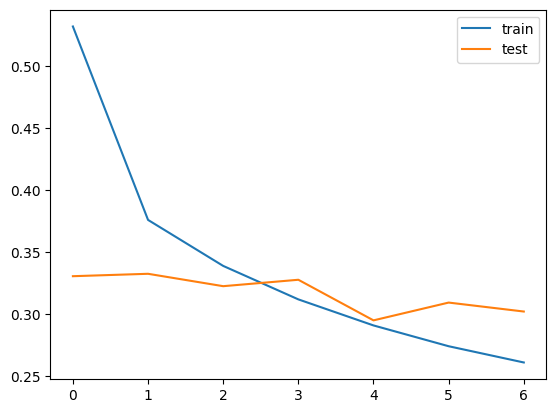

In [85]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [61]:
#train
LSTM_Word2Vec_train_score = model.evaluate(X_train, y_train, batch_size=1024, verbose=1)
print('Train Loss:', LSTM_Word2Vec_train_score[0])
print('Train Accuracy:', LSTM_Word2Vec_train_score[1])


94/94 [==============================] - 105s 1s/step - loss: 0.2347 - accuracy: 0.9241
Train Loss: 0.23468759655952454
Train Accuracy: 0.9240833520889282


In [62]:
model.save('News_Classification_bidirectional_lstm_model.keras')

In [63]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

In [64]:
y_pred = model.predict([X_test], 1024)

24/24 [==============================] - 31s 1s/step


In [65]:
y_pred = y_pred.argmax(axis=1)

In [66]:
y_pred

array([3, 3, 3, ..., 1, 3, 1])

In [67]:
y_test

array([3, 3, 3, ..., 1, 3, 1])

In [68]:
report = classification_report(y_test, y_pred)

In [69]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6062
           1       0.97      0.95      0.96      6008
           2       0.87      0.88      0.87      5946
           3       0.88      0.90      0.89      5984

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



<Axes: >

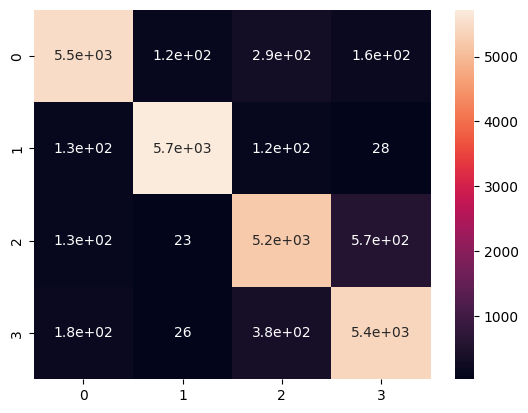

In [70]:
import seaborn as sns
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix , annot=True)

In [71]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [72]:
accuracy

0.91

In [73]:
precision

0.9105544706204389

In [74]:
recall

0.9099218010316454

In [1]:
!pipreqs .

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt
